# 5. Orthogonality

In [2]:
import numpy as np
from matplotlib import pyplot as plt

## 5.1 Inner product and Orthogonality

In this section, we explore inner product and orthogonality. Inner product allows us to define intuitive geometric concepts such as length, distance, and perpendicularity in $n$ dimensional space $\mathbb{R}^n$. 

### Inner product

Let $\vec{u}$ and $\vec{v}$ be vectors in $\mathbb{R}^n$. We can view them as $n \times 1$ matrices. The transpose of $\vec{u}$, denoted as $\vec{u}^T$, is a $1\times n$ matrix. The matrix product of $\vec{u}^T$ and $\vec{v}$ yields a $1\times 1$ matrix, which can be written as a real number (a scalar) without brackets. This scalar is known as the inner product or dot product of $\vec{u}$ and $\vec{v}$. To compute it, we multiply the corresponding elements of $\vec{u}$ and $\vec{v}$ and sum the results. More precisely, if 


$$
\vec{u} = \begin{bmatrix} u_1\\ u_2 \\ \vdots \\ u_n \end{bmatrix}
$$ 

and 

$$
\vec{v} = \begin{bmatrix} v_1\\ v_2 \\ \vdots \\ v_n \end{bmatrix},
$$ 

then the dot product $\vec{u} \cdot \vec{v}$ is given by:

$$
\vec{u} \cdot \vec{v} = \vec{u}^T\vec{v} = \begin{bmatrix} u_1 & u_2 & \dots & u_n \end{bmatrix} \begin{bmatrix} v_1 \\ v_2 \\ \vdots \\ v_n \end{bmatrix} = u_1v_1 + u_2v_2 + \dots + u_nv_n
$$

```{admonition} Example 1

Compute $\vec{u} \cdot \vec{v}$ for $\vec{u} = \begin{bmatrix} 1\\ -1 \\ 2 \end{bmatrix}$ and $\vec{v} = \begin{bmatrix} -2 \\ 3 \\ 4 \end{bmatrix}$.

```

__Solution__ 

We use `numpy.dot()` to compute the dot product in Python:

In [1]:
import numpy as np

u = np.array([1, -1, 2])
v = np.array([-2, 3, 4])

uv = np.dot(u,v)
uv

3

`````{admonition} Theorem 1 (Properties of the dot product)
:class: tip

Let $\vec{u}$, $\vec{v}$ and $\vec{w}$ be vectors in $\mathbb{R}^n$, and $c \in \mathbb{R}$ be a scalar. Then

  1. $\vec{u}\cdot\vec{v} = \vec{v}\cdot\vec{u}.$
  
  2. $(\vec{u} + \vec{v})\cdot \vec{w} = \vec{u}\cdot\vec{w} + \vec{v}\cdot\vec{w}.$
  
  3. $c(\vec{u}\cdot\vec{v}) = (c\vec{u})\cdot\vec{v} = \vec{u}\cdot(c\vec{v}).$
  
  4. $\vec{u}\cdot\vec{v}\geq 0$, and $\vec{u}\cdot\vec{u} = 0$ if and only if $\vec{u}=0.$
  
`````
  
  
  
combining (2) and (3), and using induction we can show:
  
$$
(c_1\vec{u_1} + c_2\vec{u}_2 \dots c_p\vec{u}_p)\cdot \vec{w} = c_1\vec{w} \cdot \vec{u}_1 + c_2\vec{w} \cdot \vec{u}_2 + \dots c_p\vec{w} \cdot \vec{u}_p
$$
  
  

__Length of vectors__

Dot product can be used to define the length of vectors: let $\vec{u}\in \mathbb{R}^n$ then the magnitude or the _length_ of $\vec{u}$, denoted by $\|\vec{u}\|$ is defined by

$$
\|\vec{u}\| = \sqrt{\vec{u} \cdot \vec{u}}.
$$
 

- Note that this definition of length coincide with the standard notion of length in $\mathbb{R}^2$ and $\mathbb{R}^3$.


- A vector with a length of $1$ is called as a unit vector. For any vector $\vec{u}$, there exists a unit vector in the direction of $\vec{u}$. To obtain this vector, we first calculate the length of $\vec{u}$ and then divide $\vec{u}$ by its length $\|\vec{u}\|$. The resulting vector is referred to as the unit vector of $\vec{u}$, and commonly denoted as $\vec{e}_u$:

$$
\vec{e}_u = \frac{\vec{u}}{\|\vec{u}\|}
$$

This process is often called normalizing a vector, as it transforms $\vec{u}$ into a unit vector by scaling it to have a length of $1$.

```{admonition} Example 2

Let $\vec{u} = \begin{bmatrix} 1\\ 2 \\ 3 \end{bmatrix}$. Compute the following:

1. $\|\vec{u}\|$

2. $\|-2\vec{u}\|$

3. $\vec{e}_u$

```
__Solution:__

In [2]:
# (1)

u = np.array([1,2,3])

uu = np.dot(u,u)

length_u = np.sqrt(uu)

length_u

3.7416573867739413

In [3]:
# (2)

v = -2*u

vv = np.dot(v,v)

length_v = np.sqrt(vv)

length_v

7.483314773547883

We could also use the properties of the dot products to compute $\|-2\vec{u}\|$:
    
$$\|-2\vec{u}\| = \sqrt{-2\vec{u}\cdot -2 \vec{u}} = 2 (\vec{u}\cdot\vec{u}) = 2 \|\vec{u}\|$$


In [4]:
#(3) comuting the unit vector of u

e_u = u/length_u

e_u

array([0.26726124, 0.53452248, 0.80178373])

Let's check that the length of $\vec{e}_u$ is exactly 1:

In [5]:
length_e = np.sqrt(np.dot(e_u,e_u))

length_e

1.0

```{admonition} Example 3

Given vectors 

$$
\vec{u} = \begin{bmatrix} 1\\ -1 \\ 2 \end{bmatrix}
$$ 

and 

$$
\vec{v} = \begin{bmatrix} -2 \\ 3 \\ 4 \end{bmatrix},
$$

and the subspace $W$ spanned by $\vec{u}$ and $\vec{v}$, find unit vectors $\vec{w}_1$ and $\vec{w}_2$ that form a basis for $W$.
```

__Solution:__

Since $\vec{u}$ and $\vec{v}$ are linearly independent (they are not scalar multiples of each other), we can proceed to normalize them to get unit vectors. 

In [31]:
# unit vector of u
u = np.array([1,-1,2])
e_u = u / np.sqrt(np.dot(u,u))


# unit vector of v
v = np.array([-2, 3, 4])
e_v = v / np.sqrt(np.dot(v,v))


print("e_u = ", e_u)
print("e_v = ", e_v)

e_u =  [ 0.40824829 -0.40824829  0.81649658]
e_v =  [-0.37139068  0.55708601  0.74278135]


__Distance in $\mathbb{R}^n$__

For $\vec{u}$ and $\vec{v}$ in $\mathbb{R}^n$, the distance between $\vec{u}$ and $\vec{v}$, denoted by $\text{dist}\ (\vec{v}, \vec{u})$, is the length of their difference vector $\vec{u} - \vec{v}$. That is,

$$
\text{dist}\ (\vec{u}, \vec{v}) = \|\vec{u} - \vec{v}\|.
$$

Note that this definition coincide with the standard definition of distances in $\mathbb{R}^2$ and $\mathbb{R}^3$.


```{admonition} Example 4

Compute the distance between vectors in Example 2.
```


__Solution:__


In [6]:

w = u - v

dist = np.sqrt(np.dot(w,w))

print("The distance between ", u, " and ", v, " is ", dist)

The distance between  [1 2 3]  and  [-2 -4 -6]  is  11.224972160321824


### Angles and Orthogonality


`````{admonition} Theorem 2 (Cauchy-Schwarz inequality)
:class: tip

For $\vec{u}$ and $\vec{v}$ in $\mathbb{R}^n$ we have 

$$
|\vec{u}\cdot\vec{v}|\leq \|\vec{u}\|\|\vec{v}\|.
$$
`````

The Cauchy-Schwarz inequality gives us a way to define the notion of angel between two $n$ dimensional vectors $\vec{u}$ and $\vec{v}$. This notion also coincide with our intuition in $\mathbb{R}^2$ and $\mathbb{R}^3$:

Suppose $\vec{u}, \vec{v}\in \mathbb{R}^n$ are non-zero vectors. Note that 

$$
-1 \leq \frac{\vec{u}\cdot\vec{v}}{\|\vec{u}\|\|\vec{v}\|}\leq 1
$$

Therefore, there is a unique $\theta \in [0,\pi]$ such that 

$$
\cos(\theta) = \frac{\vec{u}\cdot\vec{v}}{\|\vec{u}\|\|\vec{v}\|}
$$

$\theta$ is reffered to as_the angel_ between $\vec{u}$ and $\vec{v}$ and is equal to 

$$
\theta = \arccos(\frac{\vec{u}\cdot\vec{v}}{\|\vec{u}\|\|\vec{v}\|})
$$


```{admonition} Example 5

Find the angel between vectors in Example 2.
```

__Solution:__


We first compute the length of $\vec{u}$ and $\vec{v}$ and then substitute them in above formula:

In [7]:
u_len = np.sqrt(np.dot(u,u))
v_len = np.sqrt(np.dot(v,v))

z = u_len * v_len

t = np.arccos(np.dot(u,v)/z)       
print("The angel between u and v is ", t ," rad")

The angel between u and v is  3.141592653589793  rad


Two vectors $\vec{u}$ and $\vec{v}$ are __orthogonal__, denoted by $\vec{u} \perp \vec{v}$, if the angle $\theta$ between them is $\frac{\pi}{2}$. Alternatively, this condition is satisfied if and only if $\vec{u}\cdot \vec{v} = 0$. It is worth noting that the zero vector $\vec{0}$ is orthogonal to every vector because $\vec{0}^T \cdot \vec{u} = 0$ for any vector $\vec{u}$.




Observe that for any two vectors $\vec{u}$ and $\vec{v}$ we have

$$
\|\vec{u}+\vec{v}\|^2 = (\vec{u} + \vec{v}) \cdot (\vec{u} + \vec{v}) = \| \vec{u}\|^2 + \| \vec{v}\|^2 + 2 \vec{u}\cdot \vec{v}
$$

The above calculation implies the famous Pythagorean Theorem:

`````{admonition} Theorem 3 (The Pythagorean Theorem)
:class: tip

Two vectors $\vec{u}$ and $\vec{v}$ are orthogonal if and only if 

$$
\|\vec{u}+\vec{v}\|^2 =  \| \vec{u}\|^2 + \| \vec{v}\|^2 
$$

`````

__The orthogonal complement of a subspace__

Let $W \subset \mathbb{R}^n$ be a subspcae. If a vector $\vec{u}$ is orthogonal to every vector in the subspace $W$, then $\vec{u}$ is said to be orthogonal to $W$. The set of all vectors $\vec{u}$ that are orthogonal to $W$ form a subspace which is commonly called __the orthogonal complement of $W$__ and is denoted by $W^{\perp}$ (or simply $W^\perp$):

$$
W^{\perp} = \{\vec{u}\in \mathbb{R}^n: \vec{u}\cdot \vec{w} = 0 \text{ for all } \vec{w} \in W\}
$$

```{admonition} Example 6

Let $W$ be the $xy$-plane in $\mathbb{R}^3$, and let $L$ be the $z$-axis. Our intuition says $L$ is orthogonal to $W$. In fact, if $\vec{z}$ and $\vec{w}$ are nonzero vectors such that $\vec{z}\in L$ and $\vec{w}\in W$, then $\vec{z}$ is orthogonal to $\vec{w}$. Since $\vec{w}$ and $\vec{z}$ were chosen arbitrary, every vector on $L$ is orthogonal to every $\vec{w}$ in $W$. In fact, $L$ consists of all vectors that are orthogonal to the $\vec{w}$'s in $W$, and $W$ consists of all vectors $\vec{w}$ orthogonal to the $\vec{z}$’s in $L$. Mathematically,

$$
L = W^{\perp} \quad \text{and} \quad W = L^{\perp}
$$
```

```{admonition} Example 7

If $W = span\left\lbrace \begin{bmatrix}
1\\0\\0
\end{bmatrix} \right\rbrace$, find a basis for $W^{\perp}$.
```

__Solution__:

Note that $W$ is simply the $x$-axis in $\mathbb{R}^3$. Intuitively, $W^{\perp}$ should be the $yz$-plane, and a basis for it is 

$$
B = \left\lbrace \begin{bmatrix}
0\\1\\0
\end{bmatrix}, \begin{bmatrix}
0\\0\\1
\end{bmatrix} \right\rbrace.
$$

Alternatively, we can find the solutions to the linear system:

$$
\begin{bmatrix}
1 & 0 &0 
\end{bmatrix}\begin{bmatrix}
x \\y \\ z
\end{bmatrix} = \vec{0}.
$$

We have:

$$
\begin{bmatrix}
x \\y \\ z
\end{bmatrix} = \begin{bmatrix}
0 \\y \\ z
\end{bmatrix} = y \begin{bmatrix}
0 \\1 \\ 0
\end{bmatrix} + z \begin{bmatrix}
0 \\0 \\ 1
\end{bmatrix}.
$$


We conclude this section with a theorem summarizing the properties of the orthogonal complement of a subspace.

`````{admonition} Theorem 4
:class: tip

Let $W$ be a subspace of $\mathbb{R}^n$.

1. The orthogonal complement $W^{\perp}$ is also a subspace of $\mathbb{R}^n$.

2. The sum of the dimensions of $W$ and $W^{\perp}$ is equal to the dimension of the ambient space $\mathbb{R}^n$, i.e., $dim(W) + dim(W^{\perp}) = n$.

3. If $W$ is the column space of some matrix $A$, i.e., $W = \text{col}(A)$, then $W^{\perp}$ is precisely the null space of the transpose of $A$, i.e., $W^{\perp} = \text{null}(A^{T})$.
`````

### Exercises

```{admonition} Exercises

1. Let  $ \vec{a} = \begin{bmatrix}1 \\ 2 \\ 3 \\ 4 \end{bmatrix}$. 

    a. Find a vector $\vec{w}$ that is in the opposite direction of $\vec{a}$ and has a magnitude of 2.
    
    b. Find two non-parallel vectors $\vec{u}$ and $\vec{v}$ which are both orthogonal to $\vec{a}$



2. Find two non-parallel vectors $\vec{u}$ and $\vec{v}$ which are both orthogonal to $\begin{bmatrix}
1 \\ 2 \\ 3 \end{bmatrix}$ and $\begin{bmatrix} 2 \\ -1 \\ 0 \end{bmatrix}.$


3. Let 

$$
\vec{v}= \begin{bmatrix}
1\\2\\7
\end{bmatrix}
$$ 

and  

$$
\vec{w}= \begin{bmatrix}
1\\-1\\1
\end{bmatrix}.
$$

   a. Find $\vec{z}= \vec{v}- \displaystyle\left(\frac{\vec{v}\cdot \vec{w}}{\vec{w}\cdot \vec{w}}\right)\vec{w}.$
   
   b. Check that $\vec{z}$ is orthogonal to $\vec{w}.$



4. If 

$$
W = span\left\lbrace\ \begin{bmatrix}
1\\2\\3 \\ 4
\end{bmatrix}\ \right\rbrace
$$ 

find a basis for $W^{\perp}$.

```


## 5. 2 Orthogonal Projection

In this section we explore the construction of orthogonal projections which is a key step in many calculations involving orthogonality, and discusses some properties of projection maps.

### Orthogonal Set

A set of vectors $\{\vec{u}_1, \vec{u}_2, \dots, \vec{u}_p\}$ in $\mathbb{R}^{n}$ is called an _orthogonal set_ if each pair of distinct vectors from the set is orthogonal, meaning that $\vec{u}_i \cdot \vec{u}_j = 0$ whenever $i \neq j$. It is important to note that an orthogonal set, consisting of __nonzero vectors__, is always a linearly independent set. For that reason, if a basis for a subspace $W$ of $\mathbb{R}^n$ happens to be an orthogonal set, it is called an __orthogonal basis__.


In general, an orthogonal basis makes computations easier. The following theorem demonstrates how:

`````{admonition} Theorem 5 
:class: tip

Let 

$$
B = \{\vec{u}_1, \vec{u}_2, \dots, \vec{u}_p\}
$$ 

be an orthogonal basis for a subspace $W\subset \mathbb{R}^n$. Moreover, suppose $y\in W$ can be expressed as a linear combination of the basis elements:

$$
\vec{y} = c_1\vec{u}_1 + c_2\vec{u}_2 + \dots + c_p\vec{u}_p.
$$

Then the weights $c_i$ are given by

$$
c_i = \frac{\vec{u}_i\cdot \vec{y}}{\vec{u}_i\cdot \vec{u}_i} \quad \forall i\in \{1, 2, \dots, p\}.
$$
`````

```{admonition} Example 1 

Write the vector 

$$
\vec{y} = \begin{bmatrix} 6 \\ 1\\ -8 \end{bmatrix}
$$ 

as a linear combination of the vectors in 

$$
S = \left \{\ \begin{bmatrix} 3 \\ 1\\ 1 \end{bmatrix}, \begin{bmatrix} -1 \\ 2\\ 1 \end{bmatrix}, \begin{bmatrix} -1 \\ -4\\ 7 \end{bmatrix}\ \right \}.
$$
```
__Solution:__

Since $S$ is an orthogonal set with three nonzero elements, it forms a basis for $\mathbb{R}^3$. Therefore, we can express $\vec{y}$ in terms of the vectors in $S$:

$$
\vec{y} = c_1 \begin{bmatrix} 3 \\ 1\\ 1 \end{bmatrix} + c_2 \begin{bmatrix} -1 \\ 2\\ 1 \end{bmatrix} + c_3 \begin{bmatrix} -1 \\ -4\\ 7 \end{bmatrix}.
$$

We can solve this vector equation for $c_i$s using techniques we learned in section 1.2. However, Theorem 1 suggests an alternative way for computing the coefficients:

$$
c_i = \frac{\vec{u}_i \cdot \vec{y}}{\vec{u}_i \cdot \vec{u}_i} \quad \text{for all } i\in \{1, 2, 3\}.
$$

By substituting the appropriate values of $\vec{u}_i$ and $\vec{y}$ into the formula, we can compute the coefficients $c_i$s.


In [8]:
y = np.array([6, 1, -8])

u1 = np.array([3, 1, 1])

u2 = np.array([-1, 2, 1])

u3 = np.array([-1,-4, 7])

#computing the weights:

c1 = np.dot(y,u1)/ np.dot(u1,u1)

c2 = np.dot(y,u2)/ np.dot(u2,u2)

c3 = np.dot(y,u3)/ np.dot(u3,u3)

print("c1 = ", c1, ", c2 = ", c1, ", c3 = ", c3)

c1 =  1.0 , c2 =  1.0 , c3 =  -1.0


### Orthogonal Projections onto $1$-dimensional spaces

Given a nonzero vector $\vec{y}$ in $\mathbb{R}^n$, decomposing $\vec{y}$ into a sum of two vectors is a straightforward task. For example, for any choice of $\alpha, \beta \in \mathbb{R}$ such that $\alpha + \beta = 1$, we have:

$$
\vec{y} = \alpha \vec{y} + \beta \vec{y}.
$$

A more challenging question is when we want to express $\vec{y}$ as the sum of two vectors, where one is a scalar multiple of a given vector $\vec{u}$ and the other is orthogonal to $\vec{u}$. More perciesely, we seek to write:

$$
\vec{y} = \vec{p} + \vec{z},
$$

where $\vec{p} = \alpha \vec{u}$ for some scalar $\alpha$, and $\vec{z} \perp \vec{p}$. In other words, we are looking for a scalar $\alpha$ such that $\vec{z} := \vec{y} - \alpha \vec{u}$ is orthogonal to $\vec{u}$, which can be expressed as:

$$
(\vec{y} - \alpha \vec{u}) \cdot \vec{u} = 0.
$$

Simplifying the equation above, we find:

$$
\alpha = \frac{\vec{y} \cdot \vec{u}}{\vec{u} \cdot \vec{u}}, \quad \text{and thus} \quad \vec{p} = \frac{\vec{y} \cdot \vec{u}}{\vec{u} \cdot \vec{u}} \ \vec{u}, \quad \text{and} \quad \vec{z} = \vec{y} - \vec{p}.
$$

The vector $\vec{p}$, sometimes denoted as $\text{proj}_{\vec{u}}(\vec{y})$, is called the __orthogonal projection of $\vec{y}$ onto $\vec{u}$__, and $\vec{z}$ is referred to as the __component of $\vec{y}$ orthogonal to $\vec{u}$.__

```{admonition} Example 2

Suppose 

$$
\vec{y} = \begin{bmatrix} 7 \\ 6 \end{bmatrix}$ and $\vec{u} = \begin{bmatrix} 4 \\ 2 \end{bmatrix}
$$. 

Compute the $\text{proj}_{\vec{u}}(\vec{y})$ and the component of $\vec{y}$ orthogonal to $\vec{u}$ 
```
   
__Solution:__ 

In [9]:
# setup vectors

y = np.array([7,6])

u = np.array([4,2])

# projection of y onto u

proj_y_u = (np.dot(y,u)/ np.dot(u,u))* u
print( "the projection of y onto u is ", proj_y_u) 

z = y - proj_y_u

print("the component of y orthogonal to u is", z )

the projection of y onto u is  [8. 4.]
the component of y orthogonal to u is [-1.  2.]


Let's plot $\text{proj}_{\vec{u}}(\vec{y})$ and the component of $\vec{y}$ orthogonal to $\vec{u}$  in $xy$-plane:

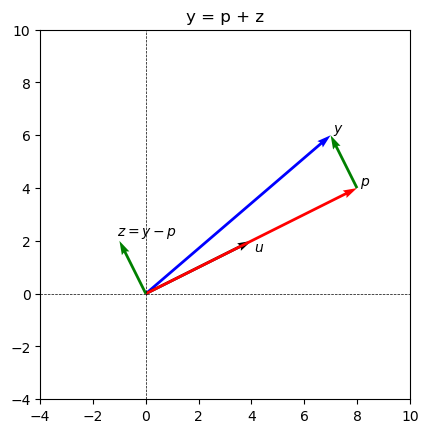

In [10]:
# Plot the coordinates in two separate plots
fig, ax = plt.subplots()

figsize=(20, 10)

# vector y
ax.quiver(0, 0, 7, 6, angles='xy', scale_units='xy', scale=1, color='blue', label ='y')
ax.text(7.1,6.1,'$y$')

# vector u
ax.quiver(0, 0, 4, 2, angles='xy', scale_units='xy', scale=1, color='black')
ax.text(4.1,1.6,'$u$')

# orthogonal projection p
ax.quiver(0, 0, 8, 4, angles='xy', scale_units='xy', scale=1, color='red')
ax.text(8.1,4.1,'$p$')

# vector z
ax.quiver(0, 0, -1, 2, angles='xy', scale_units='xy', scale=1, color='green')
ax.text(-1.1,2.2,'$z = y - p$')

# A copy of vector z starting at the end of vector p
ax.quiver(8, 4, -1, 2, angles='xy', scale_units='xy', scale=1, color='green')



ax.set_xlim([-4, 10])
ax.set_ylim([-4, 10])
ax.set_aspect('equal')
ax.axhline(y=0, color='black', linestyle='--', linewidth=0.5)
ax.axvline(x=0, color='black', linestyle='--', linewidth=0.5)

ax.set_title('y = p + z')


plt.show()



### Orthogonal Projections onto a general subspace

Let's take another look the above Figure from Example 2. The projection of $\vec{y}$ onto any vector in the direction of $\vec{u}$, results in the same vector $\text{proj}_{\vec{u}}(\vec{y})$. In fact, what matters to us is the line that contains $\vec{u}$ (span$(\{\vec{u}\})$). With this in mind, we can interpret $\text{proj}_{\vec{u}}(\vec{y})$ as the projection of $\vec{y}$ onto a subspace of $\mathbb{R}^n$ generated by $\vec{u}$, and we can write it as $\text{proj}_{\text{span}(L)}(\vec{y})$. In fact, the notion of projection can be generalized to any subspace of $\mathbb{R}^n$.



`````{admonition} Theorem 6
:class: tip

Let $W$ be a subspace of $\mathbb{R}^n$. Then each $\vec{y}\in \mathbb{R}^n$ can be written uniquely as

$$
\vec{y} = \vec{p} + \vec{z}
$$

where $\vec{p}$ is in $W$ and $\vec{z}$ is in $W^{\perp}$. Moreover, if $B = \{\vec{u}_1, \vec{u}_2, \dots \vec{u}_p\}$ is any orthogonal basis of $W$, then

$$
\vec{p} =  \frac{\vec{y}\cdot \vec{u}_1}{\vec{u}_1\cdot \vec{u}_1} + \frac{\vec{y}\cdot \vec{u}_2}{\vec{u}_2\cdot \vec{u}_2} + \dots + \frac{\vec{y}\cdot \vec{u}_p}{\vec{u}_p\cdot \vec{u}_p} \quad  (**) \quad \text{and} \quad \vec{z} = \vec{y} - \vec{p} 
$$

`````

The vector $\vec{p}$, sometimes denoted by $\text{proj}_{W}(\vec{y})$ is called the __orthogonal projection__ of $\vec{y}$ onto $W$, and $\vec{z}$ is called the component of $\vec{y}$ orthogonal to $W$. 

```{admonition} Example 3

Suppose 

$$
\vec{u} _1 = \begin{bmatrix} 2 \\ 5 \\ -1 \end{bmatrix},
$$

$$\vec{u}_2 = \begin{bmatrix} -2 \\ 1 \\ 1 \end{bmatrix},
$$, 

$W = \text{span} (\vec{u}_1, \vec{u}_2)$ and 

$$
\vec{y} = \begin{bmatrix} 1 \\ 2 \\ 3 \end{bmatrix}.
$$

Compute the $\text{proj}_{W}(\vec{y})$ and the component of $\vec{y}$ orthogonal to $\vec{u}.$ 
```
   
__Solution:__ 

$\vec{u}_1$ and $\vec{u}_2$ are orthogonal and form a basis for $W$; thus, we can use Theorem 3 to compute the projection of $\vec{y}$ onto $W$:

In [11]:
# setup vectors

u1 = np.array([2,5,-1])

u2 = np.array([-2,1,1])

y = np.array([1,2,3])

# projection of y onto W

proj_y_W = (np.dot(y,u1)/ np.dot(u1,u1))* u1  +  (np.dot(y,u2)/ np.dot(u2,u2))* u2

print( "The projection of y onto W is ", proj_y_W, '\n') 

# component of y orthogonal to p
z = y - proj_y_W

print("The component of y orthogonal to u is", z )

The projection of y onto W is  [-0.4  2.   0.2] 

The component of y orthogonal to u is [1.4 0.  2.8]


Note that if $\vec{y}$ happens to be in $W$ then $\text{proj}_{W}(\vec{y}) = \vec{y}$. We can verify this fact for $\vec{u}_1$ which we know belongs to $W$:

In [12]:
proj_u_W = (np.dot(u1,u1)/ np.dot(u1,u1))* u1  +  (np.dot(u1,u2)/ np.dot(u2,u2))* u2
print(proj_u_W)

[ 2.  5. -1.]


### The Best Approximation Theorem

Projections can be viewed as linear transformations:

Consider a subspace $W$ of $\mathbb{R}^n$, and let $T_W: \mathbb{R}^{n} \to W$ be the mapping that sends a vector $\vec{y}$ to its orthogonal projection $\text{proj}_{W}(\vec{y})$. It is known that $T_W$ is a linear transformation. If $P$ represents the matrix of $T_W$, then $P^2 = P$. More precisely,

$$
P\vec{w} \in W \quad \forall \vec{w}\in W
$$

Informally, we say $P$ does not move elements of $W$. The following theorem states that if $\vec{u}$ is not in $W$, then $P$ sends it to _the closest point_ in $W$ from $\vec{u}$.

`````{admonition} Theorem 7 (The Best Approximation Theorem)

Let $W$ be a subspace of $\mathbb{R}^2$, and let $\vec{y}\in \mathbb{R}^n$. The projection of $\vec{y}$ onto $W$, denoted as $\vec{p} = \text{proj}_{W}(\vec{y})$, is the closest point in $W$ to $\vec{y}$ in the following sense:

$$
\| \vec{y}-\vec{p}\| \leq \|\vec{y}-\vec{w}\| \quad \forall \vec{w} \in W
$$

In particular, if $\vec{y}\in W$, then the closest point is exactly $\vec{y}$. We refer to $\vec{p}$ as the best approximation to $\vec{y}$ by elements of $W$. The real number $\| \vec{y}-\vec{p}\|$) is interpreted as the distance between the vector $\vec{y}$ and the subspace $W$.
`````

```{admonition} Example 4 

Suppose 

$$
\vec{y} = \begin{bmatrix} -1 \\ -5 \\ 10 \end{bmatrix},
$$

$$
\vec{u}_2 = \begin{bmatrix} 5 \\ -2 \\ 1 \end{bmatrix},
$$

$W = \text{span} (\vec{u}_1, \vec{u}_2)$ 

and 

$$
\vec{y} = \begin{bmatrix} 1 \\ 2 \\ -1\end{bmatrix}.
$$

   1. What is the closest point to $\vec{y}$ in $W$?

   2. Find the distance between $\vec{y}$ and $W$.
```

__Solution__ 

1. The closes point is the projection of $\vec{y}$ onto $W$:

In [13]:
# setup vectors

y = np.array([-1, -5, 10])

u1 = np.array([5, -2, 1])

u2 = np.array([1 , 2, -1])

# projection of y onto W

p = (np.dot(y,u1)/ np.dot(u1,u1))* u1  +  (np.dot(y,u2)/ np.dot(u2,u2))* u2

print( "The projection of y onto W is ", p, '\n') 


# component of y orthogonal to p
z = y - p

print("The component of y orthogonal to u is", z, '\n' )

# distance between y and W
r = np.sqrt(np.dot(z,z))
print("The distance between y and $W$ is", r )


The projection of y onto W is  [-1. -8.  4.] 

The component of y orthogonal to u is [0. 3. 6.] 

The distance between y and $W$ is 6.708203932499369


It is possible to simplify the $(**)$ formula in Theorem 6 that computes projection. First we need the following definition:

A basis $B$ for a subspace $W$ is called an __orthonormal basis__ if $B$ is an orthogonal basis and every element of $B$ is a unit vector. Any orthogonal basis can be turned into an orthonormal basis by normalizing every basis elements.

`````{admonition} Theorem 8
:class: tip

Let $W$ be a subspace of $\mathbb{R}^n$ and $B = \{\vec{u}_1, \vec{u}_2, \dots \vec{u}_p\}$ be an orthonormal basis of $W$. Then, foe every $\vec{y}\in \mathbb{R}^n$, the projection of $\vec{y}$ onto $W$ is

$$
\text{proj}_{W}(\vec{y}) = \vec{y}\cdot\vec{u_1} + \vec{y}\cdot\vec{u_2} + \dots + \vec{y}\cdot\vec{u_p}
$$
`````

We can also represent this formula even in a more compact form:

if $U = \left[ \vec{u}_1, \vec{u_2}, \dots, \vec{u}_p \right]$ then 

$$
\text{proj}_{W}(\vec{y}) = UU^{T} \vec{y} \quad (*)
$$


A matrix whose columns are orthonormal, such as $U$, is called orthogonal matrix. For an $n\times n$ orthogonal matrix $U$, beside (*), we have 

$$
U^TU = I_n 
$$


### Exercises

```{admonition} Exercises

1. Let 

$$
\cal{B}=\left\lbrace \begin{bmatrix}
1 \\ 1
\end{bmatrix}, \begin{bmatrix}
1 \\ -1
\end{bmatrix} \right\rbrace
$$ 

be a basis of $\mathbb{R}^2.$

   a. Check that this is an orthogonal basis.
   
   b. Find the coordinates of the vector 
   
   $$
   \begin{bmatrix}
3 \\ 5
\end{bmatrix}
$$ 

with respect to the basis $\cal{B}$



2. Suppose 

$$
\vec{u}_1 = \begin{bmatrix} -7 \\ 1 \\ 4 \end{bmatrix},
$$ 

$$
\vec{u}_2 = \begin{bmatrix} -1 \\ 1 \\ -2 \end{bmatrix},
$$

$W = \text{span} (\vec{u}_1, \vec{u}_2)$ and 

$$
\vec{y} = \begin{bmatrix} -9 \\ 1 \\ 6\end{bmatrix}.
$$

    a. Show that $\vec{u}_1$ and $\vec{u}_2$ are orthogonal.
    
    b. What is the closest points to $\vec{y}$ in $W$.    
    
    c. Find the distance between $W$ and $\vec{y}$.
    
    d. Convert $\{\vec{u}_1, \vec{u}_2\}$ into an orthonormal basis for $W$.
    
    e. Compute the projection of $\vec{y}$ onto $W$ using the $(*)$ formula given in Theorem 4.
    
    f. Write $\vec{y}$ as sum of two vectors one in $W$ and the other in $W^{\perp}$.
    
    ```
    

## 5. 3 The Gram–Schmidt Process

In the previous sections we saw the importance of working with an orthogonal and orthonormal bases. In this section, we explore _the Gram–Schmidt process_ which is a simple algorithm to construct an orthogonal or orthonormal basis from any nonzero subspace of $\mathbb{R}^n$.

### Idea: construction of an orthogonal basis form a basis with two elements 

To see the idea behind the Gram–Schmidt process let's review Example 2 in Section 5.2:

Suppose $\vec{y} = \begin{bmatrix} 7 \\ 6 \end{bmatrix}$ and $\vec{u} = \begin{bmatrix} 4 \\ 2 \end{bmatrix}$. $\vec{y}$ and $\vec{u}$ are linearly independent and form a basis for $\mathbb{R}^2$. Clearly, as shown in below figure, $\vec{y}$ and $\vec{u}$ are not orthogonal, however $\vec{y}$ and $\vec{z}$ (the component of $\vec{y}$ orthogonal to $\vec{u}$) form an orthogonal basis for $\mathbb{R}^2$

The projection of y onto u is  [8. 4.]
The component of y orthogonal to u is [-1.  2.]


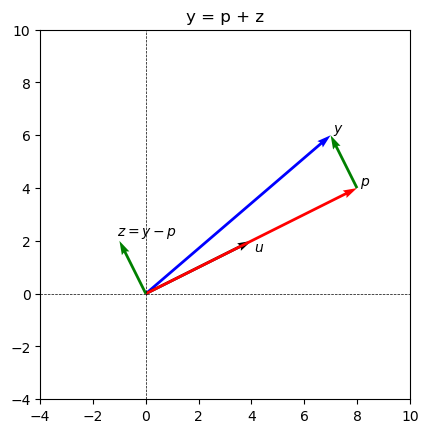

In [15]:
# setup vectors

y = np.array([7,6])

u = np.array([4,2])

# projection of y onto u

proj_y_u = (np.dot(y,u)/ np.dot(u,u))* u
print( "The projection of y onto u is ", proj_y_u) 

z = y - proj_y_u

print("The component of y orthogonal to u is", z )


# Plot the coordinates in two separate plots

fig, ax = plt.subplots()

figsize=(10, 5)

# vector y
ax.quiver(0, 0, 7, 6, angles='xy', scale_units='xy', scale=1, color='blue', label ='y')
ax.text(7.1,6.1,'$y$')

# vector u
ax.quiver(0, 0, 4, 2, angles='xy', scale_units='xy', scale=1, color='black')
ax.text(4.1,1.6,'$u$')

# orthogonal projection p
ax.quiver(0, 0, 8, 4, angles='xy', scale_units='xy', scale=1, color='red')
ax.text(8.1,4.1,'$p$')

# vector z
ax.quiver(0, 0, -1, 2, angles='xy', scale_units='xy', scale=1, color='green')
ax.text(-1.1,2.2,'$z = y - p$')

# A copy of vector z starting at the end of vector p
ax.quiver(8, 4, -1, 2, angles='xy', scale_units='xy', scale=1, color='green')



ax.set_xlim([-4, 10])
ax.set_ylim([-4, 10])
ax.set_aspect('equal')
ax.axhline(y=0, color='black', linestyle='--', linewidth=0.5)
ax.axvline(x=0, color='black', linestyle='--', linewidth=0.5)

ax.set_title('y = p + z')


#plt.tight_layout()
plt.show()


Therefore, we have converted a basis for $\mathbb{R}^2$ into an orthogonal basis for $\mathbb{R}^2$.

### Construction of an orthogonal basis form a basis with three elements 

```{admonition} Example 1

Let 

$$
\vec{x}_1 = \begin{bmatrix} 1 \\ 1 \\ 1\\ 1 \end{bmatrix},
$$, 

$$\vec{x}_2 = \begin{bmatrix} 0 \\ 1 \\ 1\\ 1 \end{bmatrix}$$, 

$$\vec{x}_3 = \begin{bmatrix} 0 \\ 0 \\ 1\\ 1 \end{bmatrix}$$, and 

$$W = \text{span}(\{\vec{x}_1, \vec{x}_2, \vec{x}_3\})$$. 

Construct an orthogonal basis for $W$.


```
__Solution:__

The set $\{\vec{x}_1, \vec{x}_2, \vec{x}_3\}$ is a linearly independent and forms a basis for $W$. We will construct an orthogonal set of vectors $\{\vec{v}_1, \vec{v}_2, \vec{v}_3\}$ such that $W = \text{span}(\{\vec{v}_1, \vec{v}_2, \vec{v}_3\})$.

__Step 1:__ 

Define $\vec{v}_1 := \vec{x}_1$ and $W_1 := \text{span}(\vec{v}_1)$.

__Step 2:__ We seek a vector $\vec{v_2}$ orthogonal to $\vec{v_1}$. Project $\vec{x}_2$ onto $W_1$; the component of $\vec{x}_2$ orthogonal to the subspace $W_1$ has the desired property:

$$\vec{v}_2 = \vec{x}_2 - \text{proj}_{W_1}^{\vec{x}_2}\quad \implies \vec{v_2} \quad \perp \vec{v_1}$$

Now, let $W_2 = \text{span}(\vec{v}_1, \vec{v}_2)$.

In [17]:
# setup vectors

x1 = np.array([1,1,1,1])

x2 = np.array([0,1,1,1])

x3 = np.array([0,0,1,1])

v1 = x1
# projection of x2 onto x1

proj_x2_v1 = (np.dot(x2,v1)/ np.dot(v1,v1))* v1
print( "The projection of x2 onto x1 is ", proj_x2_v1, '\n') 

v2 = x2 - proj_x2_v1

print("The component of x1 orthogonal to W1 is", v2 )

The projection of x2 onto x1 is  [0.75 0.75 0.75 0.75] 

The component of x1 orthogonal to W1 is [-0.75  0.25  0.25  0.25]


__Step 3:__

We can use a similar approach to construct $\vec{v}_3$. We find the orthogonal projection of $\vec{x}_3$ onto $W_2$ and define $\vec{v}_3$ as the component of $\vec{x}_3$ that is orthogonal to the subspace $W_2$:

$$
\vec{v}_3 = \vec{x}_3 - \text{proj}_{W_2}(\vec{x}_3)
$$

Since both $\vec{x}_3$ and $\text{proj}_{W_2}(\vec{x}_3)$ are elements of $W$, $\vec{v}_3$ is also in $W$. Moreover, by definition, $\vec{v}_3$ is orthogonal to both $\vec{v}_1$ and $\vec{v}_2$. Thus, $\{\vec{v}_1, \vec{v}_2, \vec{v}_3\}$ forms an orthogonal basis for $W$.

In [19]:
# projection of x3 onto W2

proj_x3_W2 = (np.dot(x3,v1)/ np.dot(v1,v1))* v1  +  (np.dot(x3,v2)/ np.dot(v2,v2))* v2

print( "the projection of x3 onto W2 is ", proj_x3_W2, '\n') 

# component of y orthogonal to p
v3 = x3 - proj_x3_W2

print("the component of x3 orthogonal to W2 is", v3 )

the projection of x3 onto W2 is  [0.         0.66666667 0.66666667 0.66666667] 

the component of x3 orthogonal to W2 is [ 0.         -0.66666667  0.33333333  0.33333333]



__Step 4 (Optional)__  

Normalizing the basis elements $\vec{v_1}$, $\vec{v_2}$, and $\vec{v_3}$, we will get unit vectors $\vec{e_1}$, $\vec{e_2}$, and $\vec{e_3}$ respectievely. $\{\vec{e_1}, \vec{e_2}, \vec{e_3}\}$ is an orthonormal basis for $W$.

In [20]:
# The unit vector of v1
e1 = v1 / np.sqrt(np.dot(v1,v1))

# The unit vector of v1
e2 = v2 / np.sqrt(np.dot(v2,v2))

# The unit vector of v1
e3 = v3 / np.sqrt(np.dot(v3,v3))

print("e1 = ", e1)
print("e2 = ", e2)
print("e3 = ", e3)

e1 =  [0.5 0.5 0.5 0.5]
e2 =  [-0.8660254   0.28867513  0.28867513  0.28867513]
e3 =  [ 0.         -0.81649658  0.40824829  0.40824829]


### The Gram_Schmidt Process

`````{admonition} Theorem 8 (the Gram-Schmidt algorithm)
:class: tip

Let $W \subset \mathbb{R}^n$ be a non-zero subspace, and $\{\vec{x_1}, \vec{x_2}, \dots, \vec{x_p}\}$ be a basis for $W$. Define:

\begin{align}
\vec{v_1} &= \vec{x_1} \quad \text{and} \quad W_1 = \text{span}(\vec{v_1}),\\
\vec{v_2} &= \vec{x_2} - \text{proj}_{W_1}(\vec{x_2}) \quad \text{and} \quad W_2 = \text{span}(\{\vec{v_1}, \vec{v_2}\}),\\
& \vdots \\
\vec{v_p} &= \vec{x_p} - \text{proj}_{W_{p-1}}(\vec{x_p}) \quad \text{and} \quad W_p = \text{span}(\{\vec{v_1}, \vec{v_2}, \dots, \vec{v_3}\}).
\end{align}

Then $W = W_p$, and $\{\vec{v_1}, \vec{v_2}, \dots, \vec{v_p}\}$ is an orthogonal basis for $W$. Moreover, if $\vec{e_1}, \vec{e_2}, \dots, \vec{e_p}$ are the unit vectors of $\vec{v_1}, \vec{v_2}, \dots, \vec{v_p}$ respectively, then $\{\vec{e_1}, \vec{e_2}, \dots, \vec{e_p}\}$ is an orthonormal basis for $W$.
`````

In [21]:
# setup A
A = np.transpose([x1, x2, x3])

# setup Q
Q = np.transpose([e1, e2, e3])

# Compute R= Q^T*A
R = np.transpose(Q) @ A


In [22]:
R

array([[2.00000000e+00, 1.50000000e+00, 1.00000000e+00],
       [1.11022302e-16, 8.66025404e-01, 5.77350269e-01],
       [1.11022302e-16, 1.11022302e-16, 8.16496581e-01]])

Note that elements below the diagonal in $R$ are very small and close to zero. In fact, $R$ should be an upper triangular matrix. The reason why Python won't display the exact decimal numbers we expect is that some decimal fractions cannot be represented exactly as binary fractions. To address this issue, we can set very small elements of $R$ to zero.

In [23]:
eps = 0.000001 
R[np.abs(R) < eps] = 0
R

array([[2.        , 1.5       , 1.        ],
       [0.        , 0.8660254 , 0.57735027],
       [0.        , 0.        , 0.81649658]])

__Numerical Note__ 

When the Gram–Schmidt process is run on a computer, round off error can build up as the vectors $\vec{v_k}$ are calculated, one by one. Specifically, for large and unequal values of $k$ and $j$, the dot products $\vec{v_k}^T \cdot \vec{u_j}$ may not be sufficiently close to zero, leading to a loss of orthogonality. This loss of orthogonality can be reduced substantially by rearranging the order of the calculations. 


We can also utilize `numpy.linalg.qr` in Python to compute the QR factorization of a matrix. This function provides an efficient and accurate implementation of the Gram-Schmidt process avoiding unnecessary loss of orthogonality. 

In [24]:
Q, R = np.linalg.qr(A)

print('Q = \n', Q, '\n\n')

print('R = \n', R)

Q = 
 [[-0.5         0.8660254   0.        ]
 [-0.5        -0.28867513  0.81649658]
 [-0.5        -0.28867513 -0.40824829]
 [-0.5        -0.28867513 -0.40824829]] 


R = 
 [[-2.         -1.5        -1.        ]
 [ 0.         -0.8660254  -0.57735027]
 [ 0.          0.         -0.81649658]]


### Exercises

```{admonition} Exercises

1. Let 

$$
\vec{x}_1 = \begin{bmatrix} 3 \\ 1 \\ -1\\ 3 \end{bmatrix},
$$,

$$
\vec{x}_2 = \begin{bmatrix} -5 \\ 1 \\ 5\\ -7 \end{bmatrix},
$$, 

$$
\vec{x}_3 = \begin{bmatrix} 1\\ 1 \\ -2\\ 8 \end{bmatrix},
$$

and 

$$
W = \text{span}(\{\vec{x}_1, \vec{x}_2, \vec{x}_3\}).
$$

Construct an orthonormal basis for $W$.


2. Let $A$ be a matrix whose columns are $\vec{x}_1$, $\vec{x}_2$, $\vec{x}_3$ from Exercise 1:

$$
A = \begin{bmatrix} 3 & -5 & 1 \\  1 & 1 & 1 \\ -1 & 5 & -2 \\ 3 & -7 & 8\end{bmatrix}.
$$

Find a QR decomposition for $A$.


3. Let $A = QR$, where $Q$ is an $m \times n$ matrix with orthogonal columns, and $R$ is an $n \times n$ matrix. Show that if the columns of $A$ are linearly dependent, then $R$ cannot be invertible.

```

## 5.4 Least-Squares Problems

Linear systems arising in applications are often inconsistent. In such situations, the best one can do is to find a vector $\vec{x}'$ that makes $A\vec{x}$ as close as possible to $\vec{b}$. We think of $A\vec{x}$ as an approximation of $\vec{b}$. The smaller $\|\vec{b} - A\vec{x}\|$, the better the approximation. Therefore, we are looking for a vector $\hat{y}$ such that $\|\vec{b} - A\hat{x}\|$ is as small as possible. Such $\vec{y}$ is called the _least square solution_ of $A\vec{x} = \vec{b}$. The name is motivated by the fact that $\|\vec{b} - A\hat{x}\|$ is the square root of a sum of squares. In this section we explore this idea further.

Let $A\vec{x} = \vec{b}$ be inconsistent, which implies $\vec{b}\notin \text{col}(A)$. Note that no matter what $\vec{x}$ is, $A\vec{x}$ lies in $\text{col}(A)$. From Section 5.2, we know that the closest point to $\vec{b}$ in $\text{col}(A)$ is the projection of $\vec{b}$ onto $\text{col}(A)$ (the best approximation problem). Let $\hat{b} = \text{proj}_{\text{col}(A)}(\vec{b})$. Since $A\vec{x} = \hat{b}$ is consistent, there are $\hat{x}$ such that $A\hat{x} = \hat{b}$. $\hat{x}$ is a least square solution of $A\vec{x} = \vec{b}$. Recall that $\vec{b} -\hat{b}$ is orthogonal to $\text{col}(A)$, and thus so is $\vec{b} - A\hat{x}$. In other words, $\vec{b} - A\hat{x}$ is orthogonal to each column of $A$, and we have:

$$
A^{T}(\vec{b} - A\hat{x}) = 0 \quad \text{or} \quad A^{T}A\vec{x}= A^{T}\vec{b}.
$$

The equation $A^{T}A\vec{x}= A^{T}\vec{b}$ is called the __normal equation__ for $A\vec{x} = \vec{b}$.

`````{admonition} Theorem 9

The set of least-squares solutions of $A\vec{x} = \vec{b}$ coincides with the nonempty set of solutions of the normal equation $A^{T}A\vec{x}= A^{T}\vec{b}$.


`````

```{admonition} Example 1

Find a least-squares solution of the inconsistent system $A\vec{x} = \vec{b}$ for 

$$
A = \begin{bmatrix} 4 & 2\\ 0 & 2 \\ 1 & 1 \end{bmatrix}
$$ 

and 

$$
\vec{b} = \begin{bmatrix} 2 \\0 \\11 \end{bmatrix}.
$$

__Solution:__ First, let's find $A^TA$ and $A^T\vec{b}$:

In [26]:
A = np.array([[4,0], [0,2], [1,1]])

b = np.array([[2], [0], [11]])

# compute A^TA
ATA = A.transpose() @ A 

print("A^TA = \n", ATA)

# compute A^Tb
ATb = A.transpose() @ b 

print("\n A^Tb = \n", ATb)

A^TA = 
 [[17  1]
 [ 1  5]]

 A^Tb = 
 [[19]
 [11]]


Thus, the normal equation for $A\vec{x} = \vec{b}$ is given by:

$$
\begin{bmatrix} 17 & 1 \\ 1 & 5 \end{bmatrix} \begin{bmatrix} x_1 \\ x_2 \end{bmatrix} = \begin{bmatrix} 19 \\ 11 \end{bmatrix}.
$$

To solve this equation, we can use row operations; alternatively, since $A^TA$ is invertible and $2 \times 2$, we can use the invertible matrix theorem. In many calculations, $A^TA$ is invertible, but this is not always the case. In Theorem 2, we will see when this is true. The least square solution $\hat{x}$ is given by:

$$
\hat{x} = (A^TA)^{-1} A^{T}\vec{b}.
$$

In [27]:
# computing x_hat

x_hat = np.linalg.inv(ATA) @ ATb
x_hat

array([[1.],
       [2.]])

```{admonition} Example 2 

Find a least-squares solution of the inconsistent system 

$$
A\vec{x} = \vec{b}
$$ 

for 

$$
A = \begin{bmatrix} 1 & 1 & 0 & 0\\ 1 & 1 & 0 & 0\\ 1 & 0 & 1 & 0\\1 & 0 & 1 & 0 \\1 & 0 & 0 & 1\\1 & 0 & 0 & 1 \end{bmatrix}
$$ 

and 

$$
\vec{b} = \begin{bmatrix} -3 \\-1 \\0 \\2 \\5 \\1 \end{bmatrix}.
$$

__Solution__ 

Let's set up the normal equation for $A\vec{x} = \vec{b}$, and find a solution for it. 

In [28]:
A = np.array([[1,1,0,0], [1,1,0,0], [1,0,1,0],[1,0,1,0], [1,0,0,1],[1,0,0,1]])

b = np.array([[-3,-1,0,2,5,1]])


# compute A^TA
ATA = A.T @ A
print('A^TA = \n', ATA)

# compute A^Tb
ATb = A.T @ b.T
print('\n A^Tb = \n', ATb)

A^TA = 
 [[6 2 2 2]
 [2 2 0 0]
 [2 0 2 0]
 [2 0 0 2]]

 A^Tb = 
 [[ 4]
 [-4]
 [ 2]
 [ 6]]


Thus, the normal equation is 

$$
\begin{bmatrix} 6 & 2 & 2 & 2 \\ 2 & 2 & 0 & 0 \\ 2 & 0 & 2 & 0 \\ 2 & 0 & 0 & 2 \end{bmatrix} \begin{bmatrix} x_1 \\ x_2 \\ x_3 \\ x_4 \end{bmatrix} = \begin{bmatrix} 4 \\ -4 \\ 2 \\6 \end{bmatrix}
$$

To solve this equation we form its augmented matrix:

In [29]:
#aumented 
M = np.concatenate((ATA, ATb), axis=1)
M

array([[ 6,  2,  2,  2,  4],
       [ 2,  2,  0,  0, -4],
       [ 2,  0,  2,  0,  2],
       [ 2,  0,  0,  2,  6]])

Call row operations:

In [30]:
# Swap two rows

def swap(matrix, row1, row2):
    
    copy_matrix=np.copy(matrix).astype('float64') 
  
    copy_matrix[row1,:] = matrix[row2,:]
    copy_matrix[row2,:] = matrix[row1,:]
    
    return copy_matrix


# Multiple all entries in a row by a nonzero number


def scale(matrix, row, scalar):
    copy_matrix=np.copy(matrix).astype('float64') 
    copy_matrix[row,:] = scalar*matrix[row,:]  
    return copy_matrix

# Replacing a row1 by the sum of itself and a multiple of rpw2 

def replace(matrix, row1, row2, scalar):
    copy_matrix=np.copy(matrix).astype('float64')
    copy_matrix[row1] = matrix[row1]+ scalar * matrix[row2] 
    return copy_matrix

In [31]:
M1 = swap(M, 0, 2)
M1

array([[ 2.,  0.,  2.,  0.,  2.],
       [ 2.,  2.,  0.,  0., -4.],
       [ 6.,  2.,  2.,  2.,  4.],
       [ 2.,  0.,  0.,  2.,  6.]])

In [32]:
M2 = scale(M1, 0, 1/2)
M2

array([[ 1.,  0.,  1.,  0.,  1.],
       [ 2.,  2.,  0.,  0., -4.],
       [ 6.,  2.,  2.,  2.,  4.],
       [ 2.,  0.,  0.,  2.,  6.]])

In [33]:
M3 = replace(M2, 1, 0, -2)
M3

array([[ 1.,  0.,  1.,  0.,  1.],
       [ 0.,  2., -2.,  0., -6.],
       [ 6.,  2.,  2.,  2.,  4.],
       [ 2.,  0.,  0.,  2.,  6.]])

In [34]:
M4 = replace(M3, 2, 0, -6)
M4

array([[ 1.,  0.,  1.,  0.,  1.],
       [ 0.,  2., -2.,  0., -6.],
       [ 0.,  2., -4.,  2., -2.],
       [ 2.,  0.,  0.,  2.,  6.]])

In [35]:
M5 = replace(M4, 3, 0, -2)
M5

array([[ 1.,  0.,  1.,  0.,  1.],
       [ 0.,  2., -2.,  0., -6.],
       [ 0.,  2., -4.,  2., -2.],
       [ 0.,  0., -2.,  2.,  4.]])

In [36]:
M6 = scale(M5, 1, 1/2)
M6

array([[ 1.,  0.,  1.,  0.,  1.],
       [ 0.,  1., -1.,  0., -3.],
       [ 0.,  2., -4.,  2., -2.],
       [ 0.,  0., -2.,  2.,  4.]])

In [37]:
M7 = replace(M6, 2, 1, -2)
M7

array([[ 1.,  0.,  1.,  0.,  1.],
       [ 0.,  1., -1.,  0., -3.],
       [ 0.,  0., -2.,  2.,  4.],
       [ 0.,  0., -2.,  2.,  4.]])

In [38]:
M8 = scale(M7, 2, -1/2)
M8

array([[ 1.,  0.,  1.,  0.,  1.],
       [ 0.,  1., -1.,  0., -3.],
       [-0., -0.,  1., -1., -2.],
       [ 0.,  0., -2.,  2.,  4.]])

In [39]:
M9 = replace(M8, 3, 2, 2)
M9

array([[ 1.,  0.,  1.,  0.,  1.],
       [ 0.,  1., -1.,  0., -3.],
       [-0., -0.,  1., -1., -2.],
       [ 0.,  0.,  0.,  0.,  0.]])

In [40]:
M10 = replace(M9, 0, 2, -1)
M10

array([[ 1.,  0.,  0.,  1.,  3.],
       [ 0.,  1., -1.,  0., -3.],
       [-0., -0.,  1., -1., -2.],
       [ 0.,  0.,  0.,  0.,  0.]])

In [41]:
M11 = replace(M10, 1, 2, 1)
M11

array([[ 1.,  0.,  0.,  1.,  3.],
       [ 0.,  1.,  0., -1., -5.],
       [-0., -0.,  1., -1., -2.],
       [ 0.,  0.,  0.,  0.,  0.]])

The general solution is $x_1 = 3 - x_4$, $x_2 = -5 + x_4$, $x_3 = -2 + x_4$, and $x_4$ is a free parameter. So the general least-squares solution of $A\vec{x} = \vec{b}$ has the form:

$$
\hat{x} = \begin{bmatrix} 3 \\ -5 \\ -2 \\ 0 \end{bmatrix} + x_4 \begin{bmatrix} -1 \\ 1 \\ 1 \\ 0 \end{bmatrix}.
$$

Any linear system $A\vec{x} = \vec{b}$ admits at least one least-squares solution (the orthogonal projection $\hat{b}$). For example, the least-squares solution of $A\vec{x} = \vec{b}$ in Example 1 was unique, while the linear system in Example 2 has infinitely many least-squares solutions.

The next theorem gives useful criteria for determining when there is only one least-squares solution.

`````{admonition} Theorem 10
:class: tip

Let $A$ be an $m\times n$ matrix. The following statements are equivalent:

   1. The equation $A\vec{x} = \vec{b}$ has a unique least-squares solution for each $\vec{b}\in \mathbb{R}^n$.
   
   2. The columns of $A$ are linearly independent.
   
   3. The matrix $A^TA$ is invertible.
   
   
In any of these cases, the least-squares solution $\hat{x}$ is given by:

$$
\hat{x} = (A^TA)^{-1} A^T \vec{b}.
$$

Moreover, if $A = QR$ is a $QR$-factorization of $A$, then the least-squares solution $\hat{x}$ is given by:

$$
\hat{x} = R^{-1} Q^{T} \vec{b}. \quad (*)
$$

`````

```{admonition} Example 3

Let $A = \begin{bmatrix} 1 & 3 & 5 \\ 1 & 1 & 0 \\ 1 & 1 & 2 \\ 1 & 3 & 3\end{bmatrix}$ and $\vec{b} = \begin{bmatrix} 3 \\ 5 \\ 7 \\ -3 \end{bmatrix}$. Find a least-squares solution of $A\vec{x} = \vec{b}$.
```

__Solution:__

A QR-factorization of $A$ can be obtained as in Section 5.3 using `numpy.linalg.qr()`:

In [42]:
A = np.array([[1,3,5], [1,1,0], [1,1,2],[1,3,3]])

# QR factorization

Q, R = np.linalg.qr(A)

print('Q = \n', Q, '\n')

print('R = \n', R)

Q = 
 [[-0.5  0.5 -0.5]
 [-0.5 -0.5  0.5]
 [-0.5 -0.5 -0.5]
 [-0.5  0.5  0.5]] 

R = 
 [[-2. -4. -5.]
 [ 0.  2.  3.]
 [ 0.  0. -2.]]


Now we compute  $\hat{x} = R^{-1} Q^{T} \vec{b}:$

In [43]:
# setup
b = np.array([[3, 5, 7, -3]]).T

#computing x_hat

x_hat = np.linalg.inv(R) @ Q.T @ b
x_hat

array([[10.],
       [-6.],
       [ 2.]])

### Numerical Note

Since $R$ in $(*)$ is an upper triangular matrix, we can alternatively compute $\hat{x}$ by finding the exact solutions of:

$$
R\hat{x} = Q^{T} \vec{b}. \quad (**)
$$

For large matrices, solving $(**)$ by back-substitution or row operations is faster than computing $R^{-1}$ and using $(*)$.

### Exercises

```{admonition}{Exercises}
1. Let 

$$
A = \begin{bmatrix} 1 & -3 & -3 \\  1 & 5 & 1 \\ 1 & 1 & 2 \\ 1 & 7 & 2\end{bmatrix}
$$

and 

$$
\vec{b} = \begin{bmatrix} 5 \\ -3 \\ -5 \end{bmatrix}.
$$


    a.  Find a least-squares solution of $A\vec{x} = \vec{b}$.
    
    b. Compute the associated least-squares error $\| \vec{b} - A\hat{x}\|$.




2. Describe all least-squares solutions of the system

$$
\begin{align*}
    x + y &= 2 \\ 
    x + y &= 4 \\ 
\end{align*}
$$

```